In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [45]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    test = {
        'data': x[k_indices[k]],
        'labels': y[k_indices[k]]
    }
    train = {
        'data': sorted(np.setdiff1d(x, test['data'])),#x[np.setdiff1d(range(len(x)), k_indices[k])],
        'labels': sorted(np.setdiff1d(y, test['labels']))#y[np.setdiff1d(range(len(x)), k_indices[k])]
    }

    # form data with polynomial degree
    poly_train = build_poly(train['data'], degree)
    poly_test = build_poly(test['data'], degree)
    
    # ridge regression
    w = ridge_regression(train['labels'], poly_train, lambda_)

    # calculate the loss for train and test data
    loss_tr = compute_mse(train['labels'], poly_train, w)
    loss_te = compute_mse(test['labels'], poly_test, w)
    
    return loss_tr, loss_te

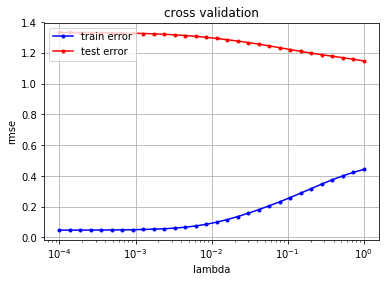

In [46]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []

    # cross validation
    for lambda_ in lambdas:
        loss_tr, loss_te = 0, 0
        for k in range(k_fold):
            l_tr, l_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            loss_tr += l_tr
            loss_te += l_te
        loss_tr /= k_fold
        loss_te /= k_fold
        rmse_tr.append(np.sqrt(2 * loss_tr))
        rmse_te.append(np.sqrt(2 * loss_te))

    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

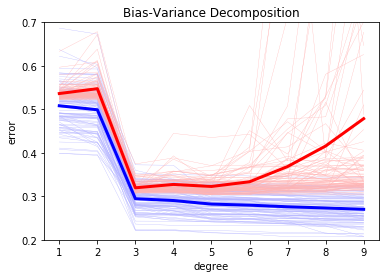

In [6]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    lambda_ = 0
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # split data with a specific seed: TODO
        x_tr, x_te, y_tr, y_te = split_data(x, y, ratio_train, seed)
        # bias_variance_decomposition: TODO
        for index_degree, degree in enumerate(degrees):
            poly_x_tr = build_poly(x_tr, degree)
            poly_x_te = build_poly(x_te, degree)
            w = ridge_regression(y_tr, poly_x_tr, lambda_)
            loss_tr = np.sqrt(2 * compute_mse(y_tr, poly_x_tr, w))
            loss_te = np.sqrt(2 * compute_mse(y_te, poly_x_te, w))
            rmse_tr[index_seed, index_degree] = loss_tr
            rmse_te[index_seed, index_degree] = loss_te

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()